# Clustering Jerárquico en el Dataset Zoo
Este notebook es una base para la tarea de clustering jerárquico usando el dataset Zoo.

   hair  feathers  eggs  milk  airborne  ...  legs  tail  domestic  catsize  type
0     1         0     0     1         0  ...     4     0         0        1     1
1     1         0     0     1         0  ...     4     1         0        1     1
2     0         0     1     0         0  ...     0     1         0        0     4
3     1         0     0     1         0  ...     4     0         0        1     1
4     1         0     0     1         0  ...     4     1         0        1     1

[5 rows x 17 columns]


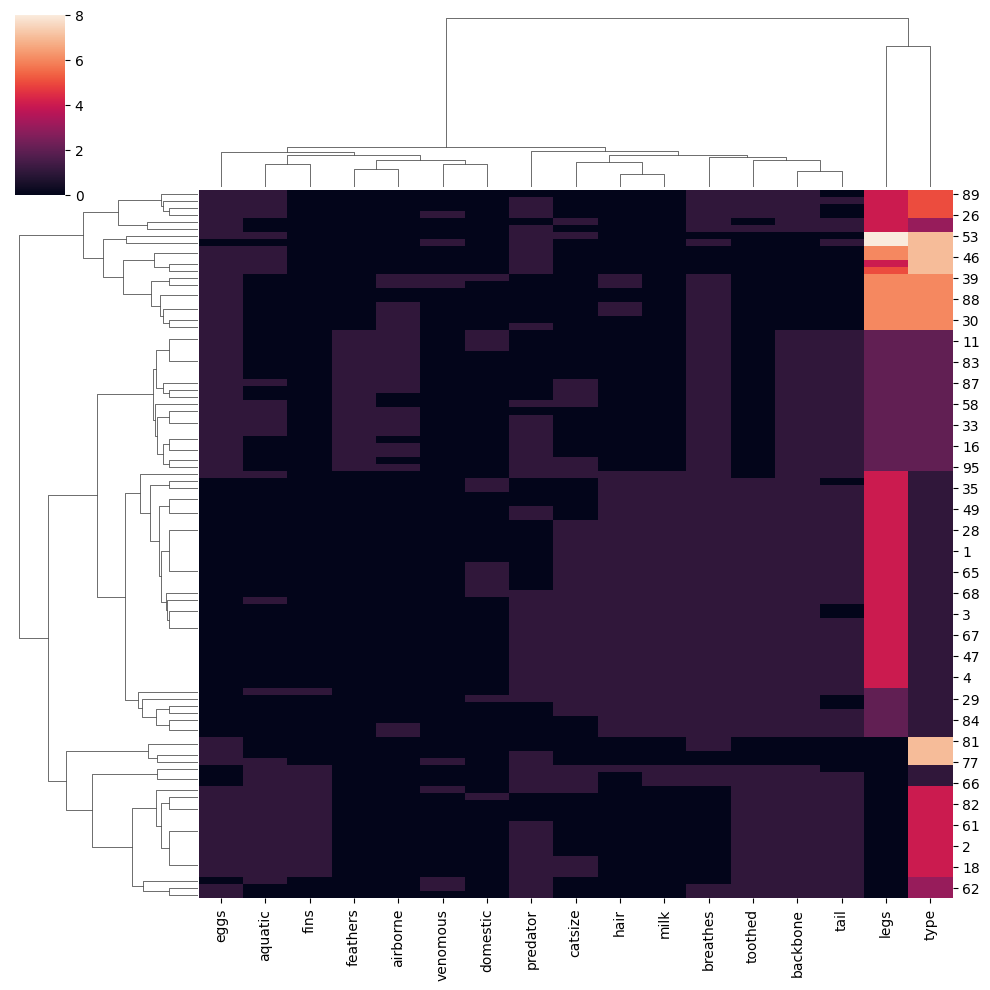

In [57]:
# Paso 1: Cargar el dataset
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from ucimlrepo import fetch_ucirepo

# Cargar dataset Zoo
zoo = fetch_ucirepo(id=111)

# Separar atributos y variable objetivo
X = zoo.data.features # df
y = zoo.data.targets # df

# Combinar en un solo df para mostrar ejemplos de datos
df = pd.concat([X, y], axis=1)
print(df.head())

# Gráfico: heatmap
sns.clustermap(df)
plt.show()

       hair  feathers      eggs  ...      tail  domestic   catsize
0  1.161395 -0.496904 -1.185227  ... -1.698416 -0.384353  1.138180
1  1.161395 -0.496904 -1.185227  ...  0.588784 -0.384353  1.138180
2 -0.861034 -0.496904  0.843721  ...  0.588784 -0.384353 -0.878595
3  1.161395 -0.496904 -1.185227  ... -1.698416 -0.384353  1.138180
4  1.161395 -0.496904 -1.185227  ...  0.588784 -0.384353  1.138180

[5 rows x 16 columns]


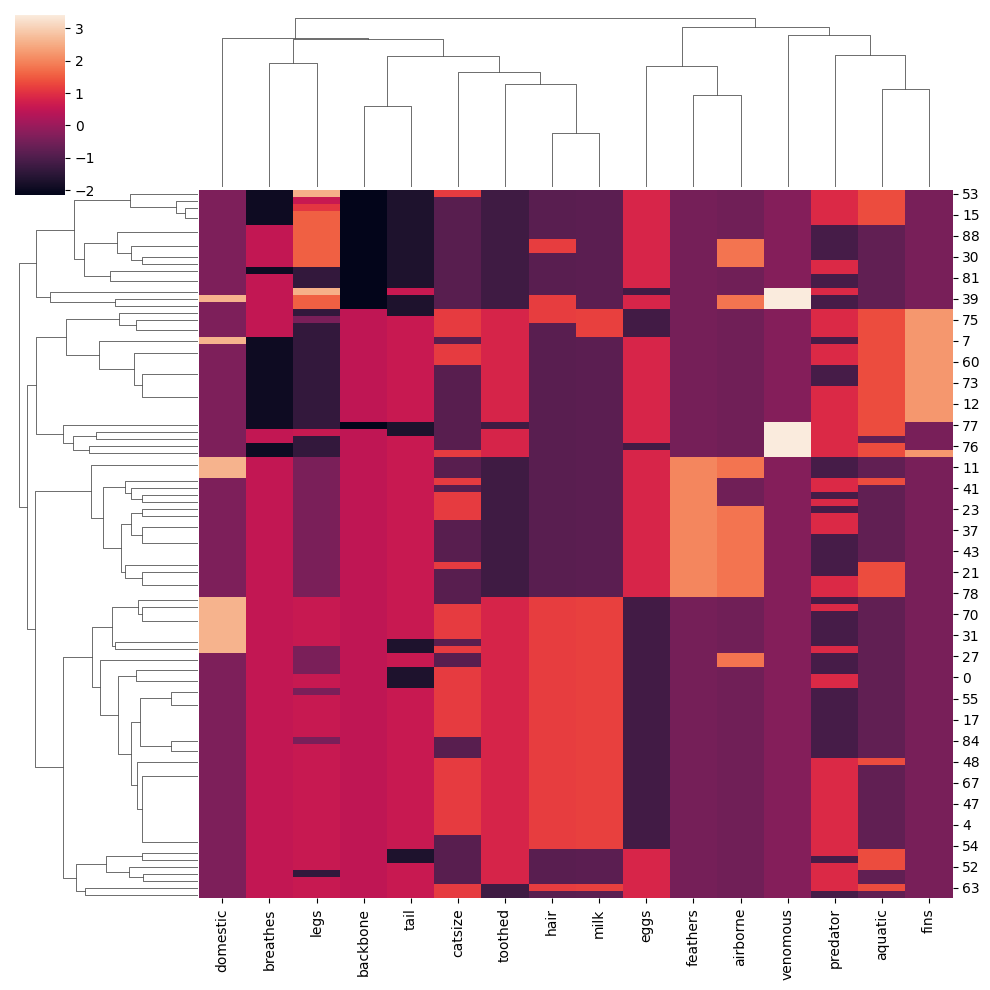

In [58]:
# Paso 2: Preprocesamiento (One Hot Encoding y Escalamiento)
from sklearn.preprocessing import StandardScaler

# Separar en atributos y variable objetivo nuevamente para preprocesar los atributos
X = df.drop(columns=['type'])  
y = df['type']

# One Hot Encoding solo en en el atributo 'legs'. No es necesario aplicar para las demás columnas porque ya son binarias
df = pd.get_dummies(df, columns=['legs'])

# Escalar los atributos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Mostrar el df escalado
print(X_scaled_df.head())

# Gráfico: heatmap del df escalado
sns.clustermap(X_scaled_df)
plt.show()

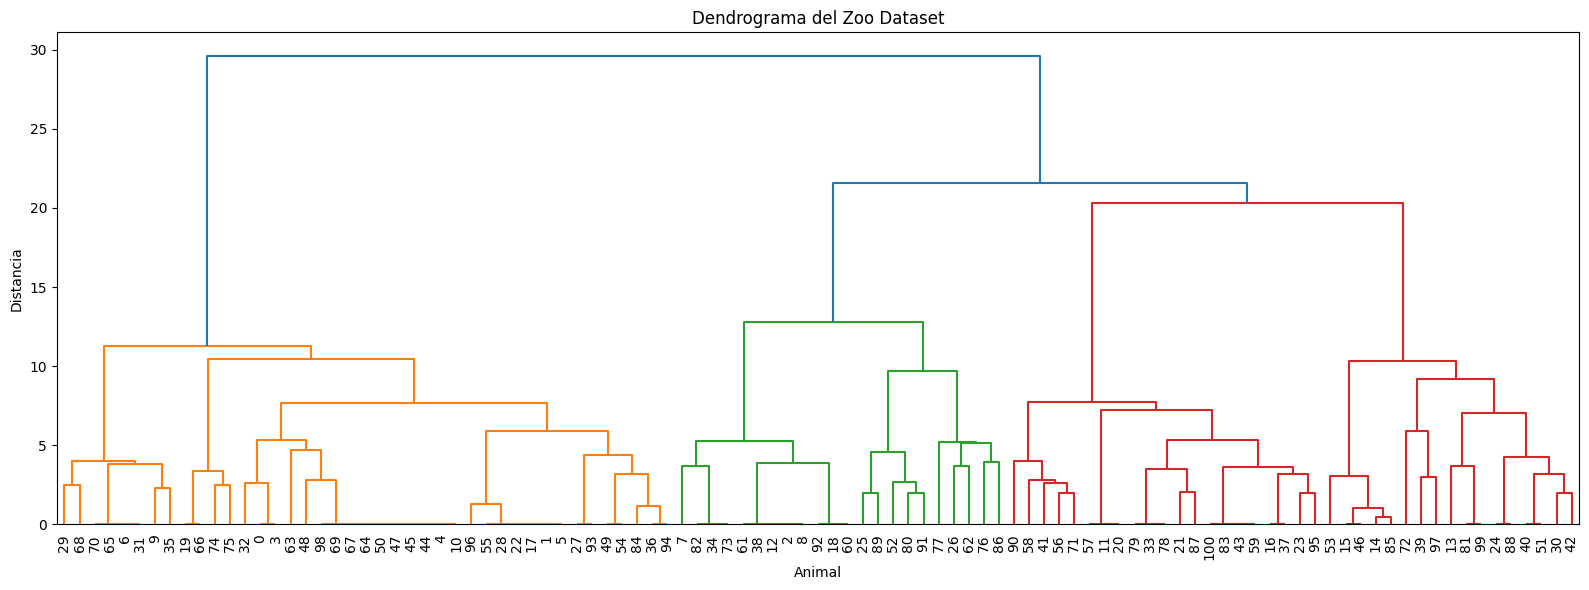

type      1   2  3   4  5  6  7
cluster                        
1         8   0  0   0  0  0  0
2         4   0  0   0  0  0  0
3        29   0  0   0  0  0  0
4         0   0  0  12  0  0  0
5         0   0  4   1  4  0  1
6         0  20  1   0  0  0  0
7         0   0  0   0  0  8  9


In [ ]:
# Paso 3: Clustering Jerárquico
from scipy.cluster.hierarchy import linkage, dendrogram

# Linkage crea la estructura jerárquica, usando el método 'ward' para minimizar la varianza intracluster
Z = linkage(X_scaled_df, method='ward')

# Dendrograma para visualizar la jerarquía
plt.figure(figsize=(16, 6))
dendrogram(
    Z,
    labels=X_scaled_df.index.tolist(),  
    leaf_rotation=90,
    leaf_font_size=10
)
plt.title("Dendrograma del Zoo Dataset")
plt.xlabel("Animal")
plt.ylabel("Distancia")
plt.tight_layout()
plt.show()

# Asignar clusters a los datos, para poder visualizar grupos artificiales y compararlos con la variable objetivo (type: 7 tipos de animales)
from scipy.cluster.hierarchy import fcluster

# Cortar el dendrograma para obtener 7 clusters
clusters = fcluster(Z, t=7, criterion='maxclust')

# Agregar columna de clusters al df
X_scaled_df['cluster'] = clusters

# Comparar clusters con la clase real (type)
# Unir con y (type)
results = pd.concat([X_scaled_df['cluster'], y], axis=1)
# Ver distribución de tipos reales por cluster
comparision = pd.crosstab(results['cluster'], results['type'])
print(comparision)

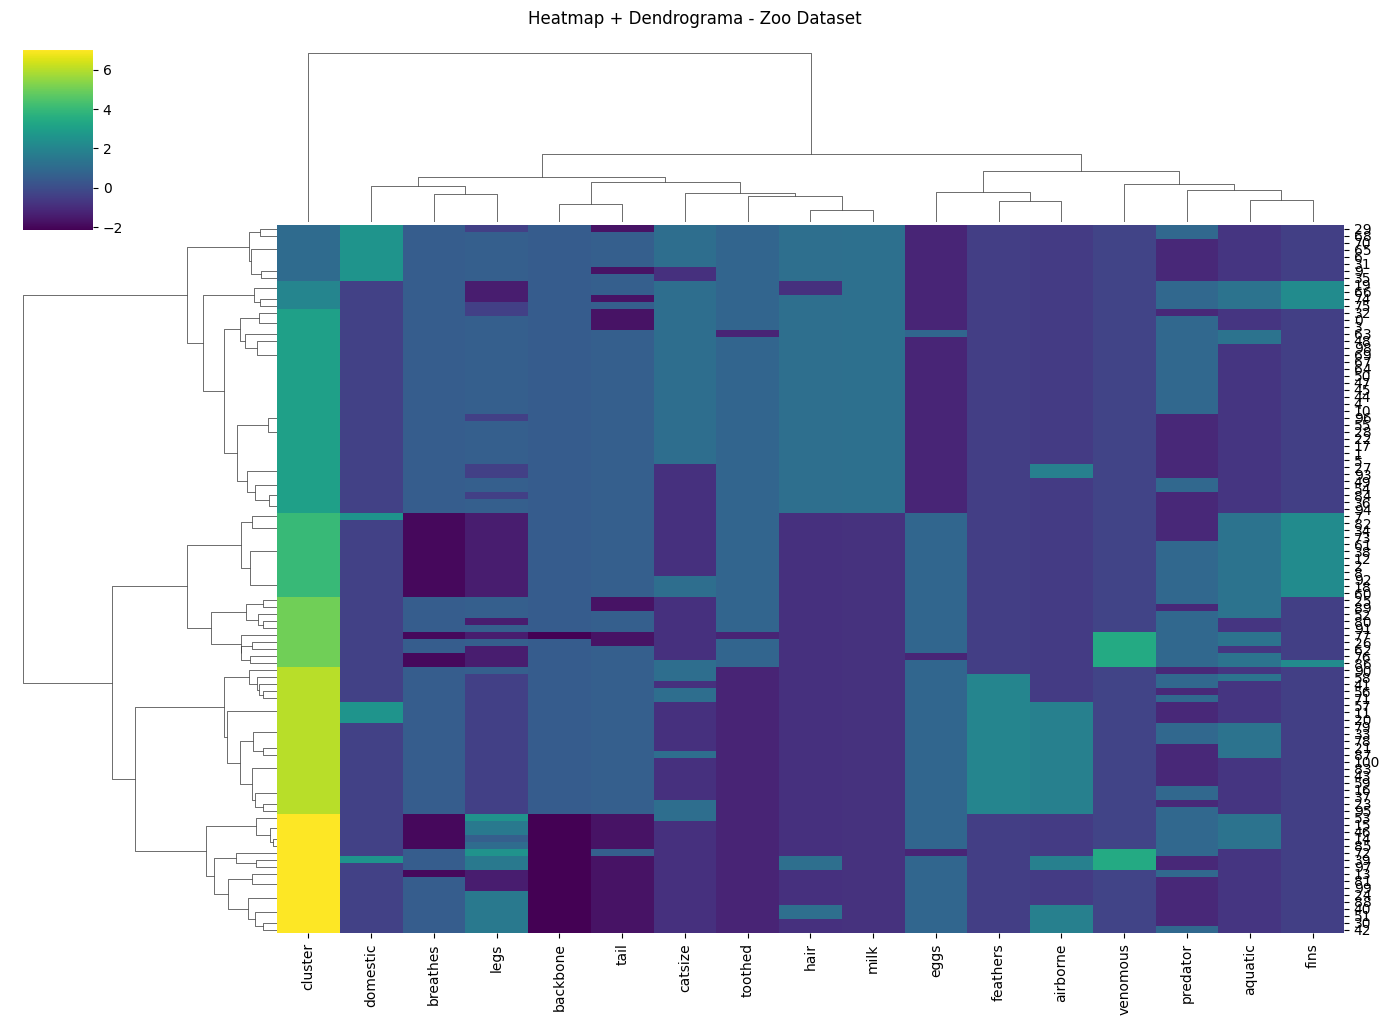

In [60]:
# Paso 4: Heatmap
sns.clustermap(
    X_scaled_df, 
    method='ward',          # método de linkage
    metric='euclidean',     # métrica de distancia
    cmap='viridis',        
    figsize=(14, 10),
    xticklabels=True,
    yticklabels=True
)

plt.suptitle("Heatmap + Dendrograma - Zoo Dataset", y=1.02)
plt.show()


# Conclusiones
Escribe aquí tus conclusiones sobre las agrupaciones obtenidas en el clustering jerárquico.

## Pregunta 1
1. ¿Cuántos clusters se pueden identificar claramente en el dendrograma?

Escribe tu respuesta aquí.

## Pregunta 2
2. ¿Qué características parecen determinar la formación de los clusters?

Escribe tu respuesta aquí.

## Pregunta 3
3. ¿Los resultados del clustering tienen sentido biológico o zoológico?

Escribe tu respuesta aquí.

## Pregunta 4
4. ¿Cómo afecta la normalización de los datos al clustering?

Escribe tu respuesta aquí.

## Pregunta 5
5. ¿Qué método de linkage utilizaste y por qué?

Escribe tu respuesta aquí.

## Pregunta 6
6. ¿Qué otras técnicas de clustering podrías aplicar a este dataset y por qué?

Escribe tu respuesta aquí.